In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
df = pd.read_csv('CombinedBettingData3.csv')
df.head()

,Unnamed: 0,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Date,WinMargin,TopLine,TLCompany,BotLine,BLCompany,Average,NumComps
0,0,SAC,UTA,11.0,40.0,0.216,29.0,22.0,0.569,2009-02-06,-4,-2,Pinnacle Sports,-3,Sportsbetting,-2.875,8
1,1,POR,UTA,29.0,17.0,0.630,26.0,22.0,0.542,2009-01-31,14,9,5Dimes,9,5Dimes,9.000,8
2,2,MEM,UTA,11.0,28.0,0.282,24.0,16.0,0.600,2009-01-16,-10,-4,5Dimes,-4,5Dimes,-4.000,8
3,3,UTA,IND,23.0,15.0,0.605,13.0,25.0,0.342,2009-01-12,7,10,Bovada,9,Sportsbetting,9.250,8
4,4,HOU,UTA,20.0,11.0,0.645,18.0,14.0,0.563,2008-12-27,5,9,5Dimes,9,5Dimes,9.000,8


In [2]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna()
df.columns

Index(['HomeTeam', 'AwayTeam', 'HTWin', 'HTLoss', 'HT%', 'ATWin', 'ATLoss',
       'AT%', 'Date', 'WinMargin', 'TopLine', 'TLCompany', 'BotLine',
       'BLCompany', 'Average', 'NumComps'],
      dtype='object')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week
df['Weekday'] = df['Date'].dt.dayofweek
df['Yearday'] = df['Date'].dt.dayofyear
df = df.sort_values(by=['Date'])
df = df.reset_index()
df = df.drop(['index','Date'], axis=1)
df.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,WinMargin,TopLine,TLCompany,BotLine,BLCompany,Average,NumComps,Year,Month,Week,Weekday,Yearday
0,MIN,SAC,1.0,0.0,1.0,0.0,1.0,0.0,9,5,Pinnacle Sports,4,Bookmaker,4.75,4,2006,11,44,2,305
1,NJN,TOR,1.0,0.0,1.0,0.0,1.0,0.0,10,7,Bookmaker,7,Bookmaker,7.00,4,2006,11,44,2,305
2,MEM,NYK,0.0,1.0,0.0,1.0,0.0,1.0,-1,5,Bovada,4,5Dimes,4.75,4,2006,11,44,2,305
3,ORL,CHI,1.0,0.0,1.0,1.0,1.0,0.5,15,-1,Bookmaker,-2,Bovada,-1.25,4,2006,11,44,2,305
4,CLE,WAS,1.0,0.0,1.0,0.0,1.0,0.0,3,6,Bovada,6,Bovada,6.00,4,2006,11,44,2,305


In [4]:
df['average'] = df['Average']
df = df.drop(['Average'], axis=1)
cols_at_end = ['WinMargin']
df = df[[c for c in df if c not in cols_at_end] + [c for c in cols_at_end if c in df]]
df1 = df.copy(deep=True)
better = df1.TLCompany.unique()
bet_dict = dict(zip(better, range(len(better))))
df1 = df1.replace({'TLCompany': bet_dict})
df1 = df1.replace({'BLCompany': bet_dict})
#try betting dummification
df1.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,Yearday,average,WinMargin
0,MIN,SAC,1.0,0.0,1.0,0.0,1.0,0.0,5,0,4,1,4,2006,11,44,2,305,4.75,9
1,NJN,TOR,1.0,0.0,1.0,0.0,1.0,0.0,7,1,7,1,4,2006,11,44,2,305,7.00,10
2,MEM,NYK,0.0,1.0,0.0,1.0,0.0,1.0,5,2,4,3,4,2006,11,44,2,305,4.75,-1
3,ORL,CHI,1.0,0.0,1.0,1.0,1.0,0.5,-1,1,-2,2,4,2006,11,44,2,305,-1.25,15
4,CLE,WAS,1.0,0.0,1.0,0.0,1.0,0.0,6,2,6,2,4,2006,11,44,2,305,6.00,3


In [5]:
df2 = df1[(df1['HomeTeam'] == 'LAL') | (df1['AwayTeam'] == 'LAL')]
df2.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,Yearday,average,WinMargin
9,GSW,LAL,0.0,1.0,0.000,2.0,0.0,1.000,7,2,7,2,4,2006,11,44,2,305,7.0,-12
48,LAL,MIN,4.0,1.0,0.800,2.0,3.0,0.400,7,2,7,2,4,2006,11,45,1,311,7.0,7
58,POR,LAL,3.0,2.0,0.600,4.0,2.0,0.667,-4,1,-5,3,4,2006,11,45,2,312,-4.5,11
64,LAL,DET,4.0,3.0,0.571,3.0,3.0,0.500,5,2,5,2,4,2006,11,45,4,314,5.0,-14
83,LAL,MEM,5.0,3.0,0.625,1.0,5.0,0.167,9,2,9,2,4,2006,11,45,6,316,9.0,10


In [6]:
team = df2.HomeTeam.unique()
team_dict = dict(zip(team, range(len(team))))
df2 = df2.replace({'HomeTeam': team_dict})
df2 = df2.replace({'AwayTeam': team_dict})
df2.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,Yearday,average,WinMargin
9,0,1,0.0,1.0,0.000,2.0,0.0,1.000,7,2,7,2,4,2006,11,44,2,305,7.0,-12
48,1,8,4.0,1.0,0.800,2.0,3.0,0.400,7,2,7,2,4,2006,11,45,1,311,7.0,7
58,2,1,3.0,2.0,0.600,4.0,2.0,0.667,-4,1,-5,3,4,2006,11,45,2,312,-4.5,11
64,1,22,4.0,3.0,0.571,3.0,3.0,0.500,5,2,5,2,4,2006,11,45,4,314,5.0,-14
83,1,14,5.0,3.0,0.625,1.0,5.0,0.167,9,2,9,2,4,2006,11,45,6,316,9.0,10


In [7]:
print (len(df2))
df2['AwayTeam'] = pd.to_numeric(df2['AwayTeam'], errors='coerce')
df2 = df2.dropna()
print (len(df2))

1026
1026


In [8]:
df2.loc[df2['HomeTeam'] == 1, 'HomeCourt'] = 1
df2.loc[df2['HomeTeam'] != 1, 'HomeCourt'] = 0
df2['Opponent'] = df2['HomeTeam'] + df2['AwayTeam'] - 1
df2.loc[df2['HomeCourt'] == 1, 'OppWin'] = df2['ATWin']
df2.loc[df2['HomeCourt'] != 1, 'OppWin'] = df2['HTWin']
df2.loc[df2['HomeCourt'] == 1, 'Win'] = df2['HTWin']
df2.loc[df2['HomeCourt'] != 1, 'Win'] = df2['ATWin']
df2.loc[df2['HomeCourt'] == 1, 'OppLoss'] = df2['ATLoss']
df2.loc[df2['HomeCourt'] != 1, 'OppLoss'] = df2['HTLoss']
df2.loc[df2['HomeCourt'] == 1, 'Loss'] = df2['HTLoss']
df2.loc[df2['HomeCourt'] != 1, 'Loss'] = df2['ATLoss']
df2.loc[df2['HomeCourt'] == 1, 'Opp%'] = df2['AT%']
df2.loc[df2['HomeCourt'] != 1, 'Opp%'] = df2['HT%']
df2.loc[df2['HomeCourt'] == 1, 'Own%'] = df2['HT%']
df2.loc[df2['HomeCourt'] != 1, 'Own%'] = df2['AT%']
df2.loc[df2['HomeCourt'] == 1, 'average'] = df2['average']
df2.loc[df2['HomeCourt'] != 1, 'average'] = -1*df2['average']
df2.loc[df2['HomeCourt'] == 1, 'WinMargin'] = df2['WinMargin']
df2.loc[df2['HomeCourt'] != 1, 'WinMargin'] = -1*df2['WinMargin']

df2.loc[df2['WinMargin'] < 0, 'OppWin'] = df2['OppWin']-1
df2.loc[df2['WinMargin'] >= 0, 'OppLoss'] = df2['OppLoss']-1
df2.loc[df2['WinMargin'] < 0, 'Loss'] = df2['Loss']-1
df2.loc[df2['WinMargin'] >= 0, 'Win'] = df2['Win']-1
df2['Opp%'] = df2['OppWin']/(df2['OppWin'] + df2['OppLoss'])
df2['Own%'] = df2['Win']/(df2['Win'] + df2['Loss'])

df2 = df2.drop(['HomeTeam','AwayTeam','HTWin','HTLoss','HT%','ATWin','ATLoss','AT%'], axis=1)

In [9]:
df2 = df2.fillna(0)
df2['Rest'] = df2['Yearday'].diff()%365
df2['PrevMargin'] = df2['WinMargin'].shift(1)
df2 = df2[df2['Rest'] < 20]
df = df.drop(['Yearday'], axis=1)
df2 = df2.dropna()
cols_at_end = ['WinMargin']
df2 = df2[[c for c in df2 if c not in cols_at_end] + [c for c in cols_at_end if c in df2]]
df2.head()
df2.head()

,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,Yearday,...,Opponent,OppWin,Win,OppLoss,Loss,Opp%,Own%,Rest,PrevMargin,WinMargin
48,7,2,7,2,4,2006,11,45,1,311,...,8,2.0,3.0,2.0,1.0,0.500000,0.750000,6.0,12.0,7
58,-4,1,-5,3,4,2006,11,45,2,312,...,2,2.0,4.0,2.0,1.0,0.500000,0.800000,1.0,7.0,-11
64,5,2,5,2,4,2006,11,45,4,314,...,22,2.0,4.0,3.0,2.0,0.400000,0.666667,2.0,-11.0,-14
83,9,2,9,2,4,2006,11,45,6,316,...,14,1.0,4.0,4.0,3.0,0.200000,0.571429,2.0,-14.0,10
111,8,2,7,3,3,2006,11,46,4,321,...,23,2.0,5.0,5.0,3.0,0.285714,0.625000,5.0,10.0,7


In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
df2 = df2.reset_index()
df2 = df2.drop(['index'], axis=1)
cols = df2.columns
sc2 = StandardScaler()
for col in cols:
    df2[[col]] = sc2.fit_transform(df2[[col]])
df2.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,Yearday,...,Opponent,OppWin,Win,OppLoss,Loss,Opp%,Own%,Rest,PrevMargin,WinMargin
0,0.541423,-0.396088,0.626247,-0.459103,-2.741044,-1.739181,1.312135,1.233643,-1.121214,1.242461,...,-0.748912,-1.263465,-1.144970,-1.213772,-1.169406,-0.061901,0.992088,3.624808,0.876081,0.516205
1,-1.016706,-0.870364,-1.051659,0.044766,-2.741044,-1.739181,1.312135,1.233643,-0.615745,1.250128,...,-1.370840,-1.263465,-1.076574,-1.213772,-1.169406,-0.061901,1.214297,-1.103405,0.512781,-0.782606
2,0.258127,-0.396088,0.346596,-0.459103,-2.741044,-1.739181,1.312135,1.233643,0.395194,1.265462,...,0.702253,-1.263465,-1.076574,-1.140732,-1.103042,-0.581881,0.621739,-0.157763,-0.795101,-0.999075
3,0.824719,-0.396088,0.905898,-0.459103,-2.741044,-1.739181,1.312135,1.233643,1.406133,1.280796,...,-0.126985,-1.335494,-1.076574,-1.067692,-1.036677,-1.621841,0.198483,-0.157763,-1.013081,0.732674
4,0.683071,-0.396088,0.626247,0.044766,-3.321453,-1.739181,1.312135,1.287135,0.395194,1.319131,...,0.805907,-1.263465,-1.008179,-0.994653,-1.036677,-1.176144,0.436565,2.679165,0.730761,0.516205


In [11]:
df3 = df2.copy(deep=True)
#df3 = df3.drop(['Year'], axis=1)

In [12]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [21], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [21], axis=1)
test_x=tests[0]
test_y=tests[1]

In [13]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [14]:
train_y.head()

,WinMargin
0,0.516205
1,-0.782606
2,-0.999075
3,0.732674
4,0.516205


## Correlation Marix

AxesSubplot(0.127273,0.125;0.617727x0.755)


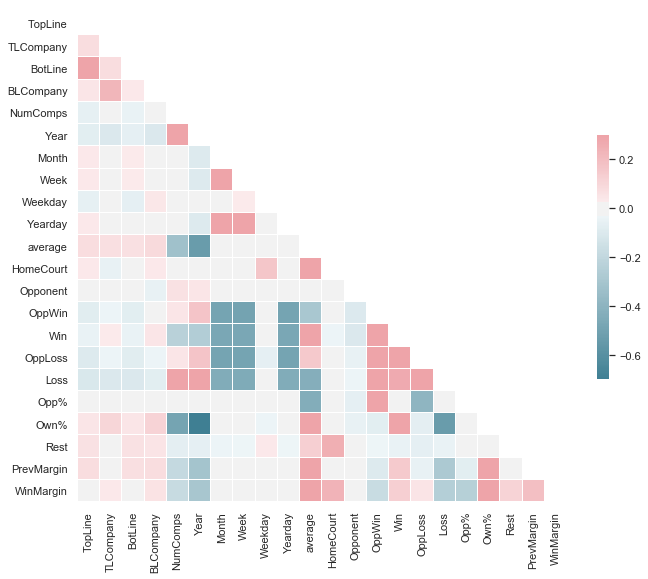

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

## Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.values)
#reg.score(train_x.values, train_y.NBAPTS.values)

reg.coef_

array([[ 0.15929477, -0.02483902, -0.15870093,  0.0017142 ,  0.21054806,
        -0.41397738, -0.41878538, -0.00588994, -0.02617716,  0.38280065,
         0.41205324,  0.05392158, -0.02932071, -0.04776366,  0.02329939,
        -0.07030359,  0.07947858, -0.08272032, -0.02839475,  0.027143  ,
        -0.01750877]])

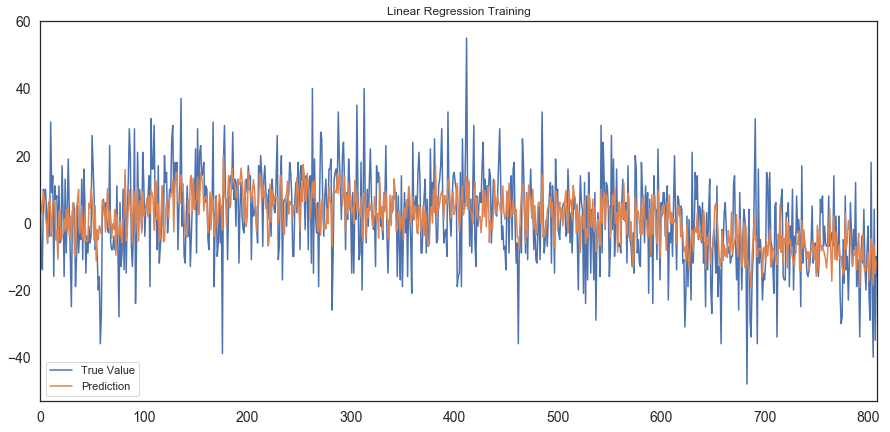

adj train r^2 = 0.28255442819437004
train mse = 125.80236943127102


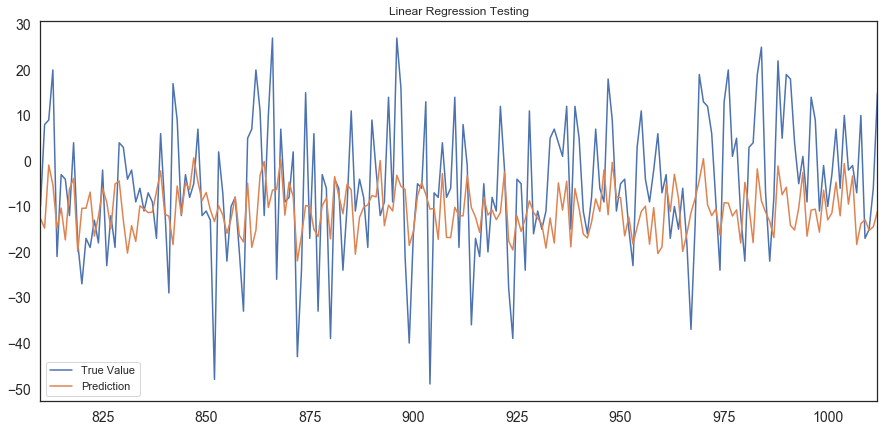

adj test r^2 = -0.02582893018895227
test mse = 206.5270720597702


In [17]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [18]:
from sklearn.metrics import accuracy_score
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3.loc[train_y3['prediction'] > train_x['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_x['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_x['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_x['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_x['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_x['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_x['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_x['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 69.51%
The testing accuracy is 65.52%


## Naive Model

In [19]:
one = (len(train_y3[train_y3['Over']>.5]) + len(test_y3[test_y3['Over']>.5])) / (len(train_y3) + len(test_y3)) * 100
zero = (len(train_y3[train_y3['Over']<.5]) + len(test_y3[test_y3['Over']<.5])) / (len(train_y3) + len(test_y3)) * 100

In [20]:
print('Always picking over the line works ' + str(round(one,2)) + '% of the time')
print('Always picking under the line works ' + str(round(zero,2)) + '% of the time')

Always picking over the line works 50.94% of the time
Always picking under the line works 49.06% of the time


## Extra Trees

In [21]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.values)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

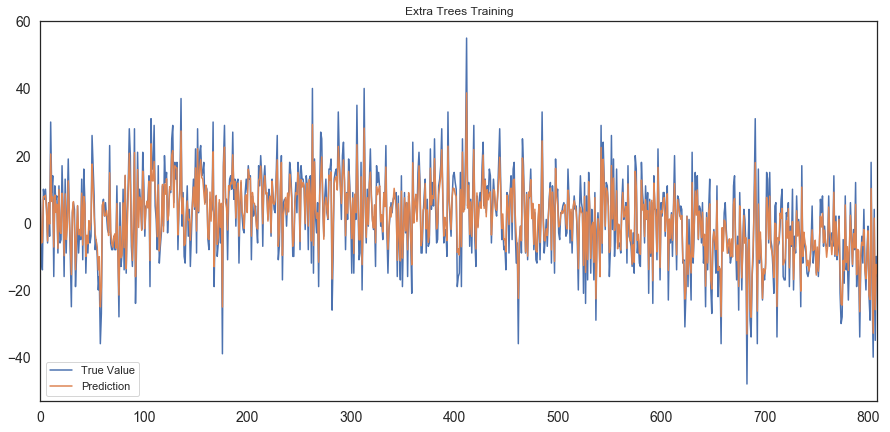

adj train r^2 = 0.8916922413396111
train mse = 18.991507095061642


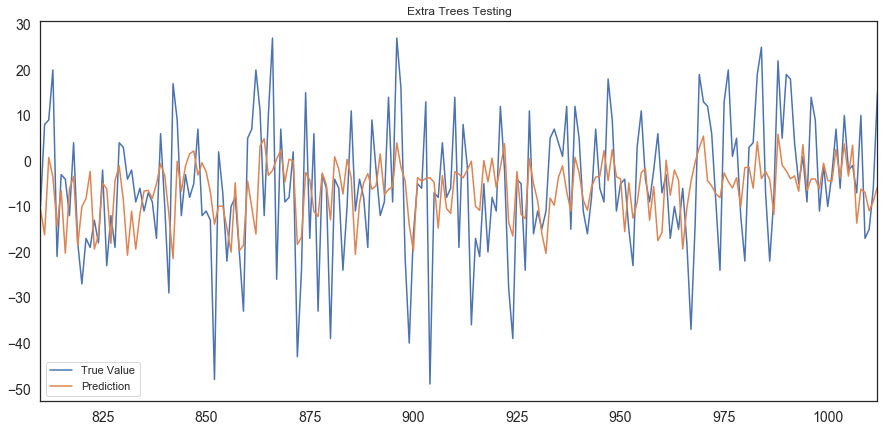

adj test r^2 = 0.11825613477914365
test mse = 177.51885663546798


In [22]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [23]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3.loc[train_y3['prediction'] > train_x['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_x['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_x['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_x['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_x['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_x['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_x['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_x['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 95.68%
The testing accuracy is 66.01%


## Random Forrest

In [24]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.WinMargin.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

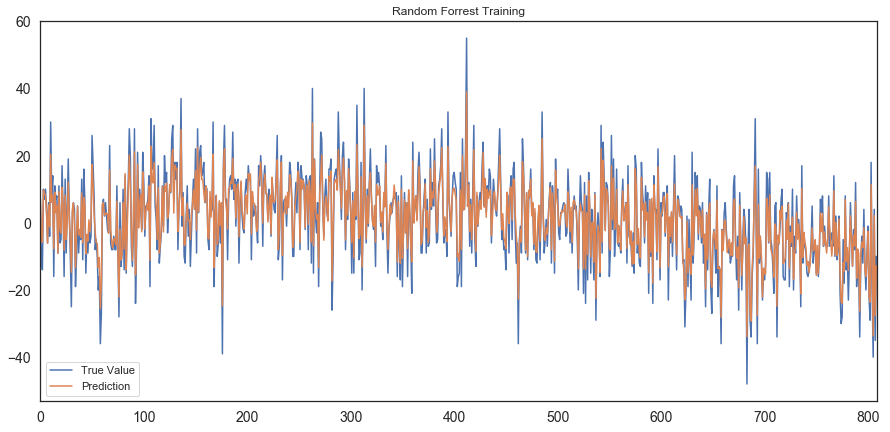

adj train r^2 = 0.8908580171316218
train mse = 19.13778631975301


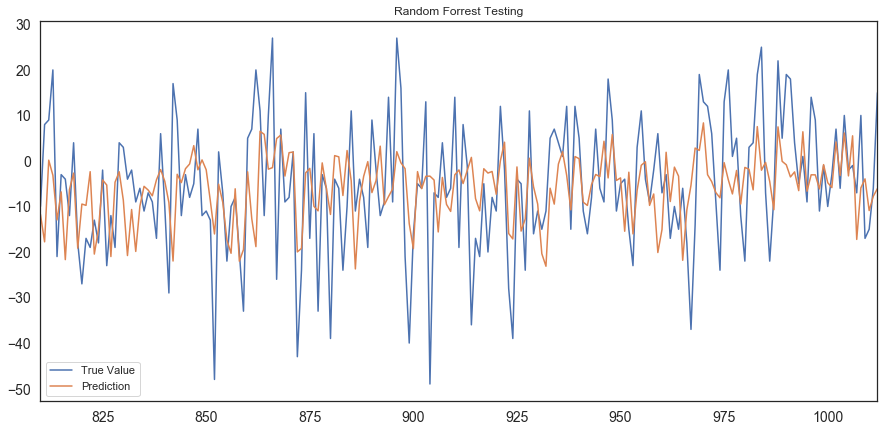

adj test r^2 = 0.09690482448184845
test mse = 181.8174521133005


In [25]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [26]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3.loc[train_y3['prediction'] > train_x['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_x['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_x['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_x['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_x['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_x['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_x['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_x['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 95.56%
The testing accuracy is 65.02%


## XGBoost

In [27]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [28]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=10000, learning_rate=0.003)
reg.fit(train_x.values, train_y.WinMargin.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.003, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

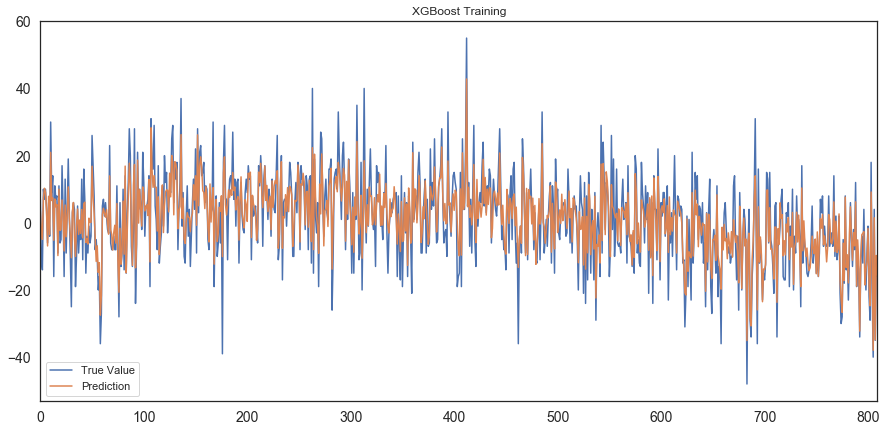

adj train r^2 = 0.7807794323789278
train mse = 38.439803545502414


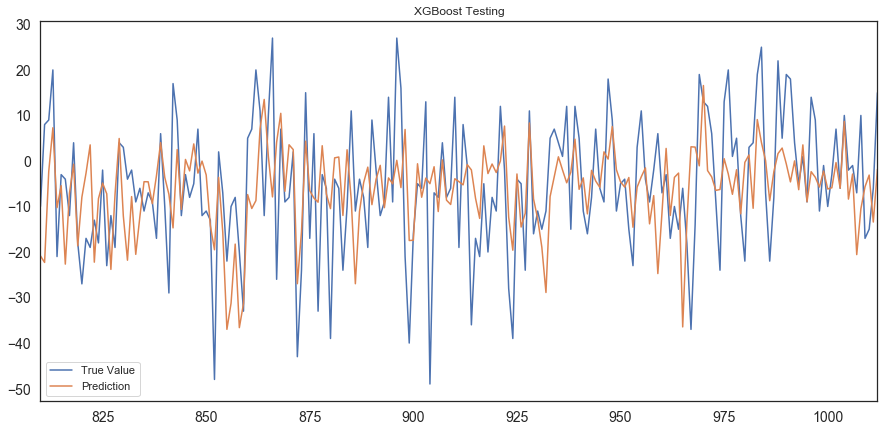

adj test r^2 = 0.051480259732835765
test mse = 190.9626439490143


In [29]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [30]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3.loc[train_y3['prediction'] > train_x['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_x['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_x['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_x['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_x['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_x['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_x['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_x['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 90.49%
The testing accuracy is 68.97%


## Feed Forward Neural Network

In [31]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

Using TensorFlow backend.


In [32]:
K.clear_session()
model = Sequential()
model.add(Dense(64, input_dim=21, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=0, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.WinMargin.values.ravel(), validation_data=[test_x.values, test_y['WinMargin'].values.ravel()], epochs=500,verbose=1,shuffle=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 810 samples, validate on 203 samples
Epoch 1/500
810/810 [==============================] - 1s 734us/step - loss: 1.5927 - val_loss: 1.1808
Epoch 2/500
810/810 [==============================] - 0s 50us/step - loss: 0.8557 - val_loss: 0.9996
Epoch 3/500
810/810 [==============================] - 0s 50us/step - loss: 0.7418 - val_loss: 0.9473
Epoch 4/500
810/810 [==============================] - 0s 49us/step - loss: 0.6982 - val_loss: 0.9314
Epoch 5/500
810/810 [==============================] - 0s 49us/step - loss: 0.6736 - val_loss: 0.9277
Epoch 6/500
810/810 [==============================] - 0s 54us/step - loss: 0.6572 - val_loss: 0.9295
Epoch 7/500
810/810 [==============================] - 0s 50us/step - loss: 0.6445 - val_loss: 0.9335
Epoch 8/500
810/810 [==============================] - 0s 50us/step - loss: 0.6341 - val_loss: 0.9381
Epoch 9/500
810/8

Epoch 75/500
810/810 [==============================] - 0s 49us/step - loss: 0.4143 - val_loss: 1.1882
Epoch 76/500
810/810 [==============================] - 0s 56us/step - loss: 0.4120 - val_loss: 1.1947
Epoch 77/500
810/810 [==============================] - 0s 49us/step - loss: 0.4094 - val_loss: 1.1972
Epoch 78/500
810/810 [==============================] - 0s 46us/step - loss: 0.4073 - val_loss: 1.1999
Epoch 79/500
810/810 [==============================] - 0s 52us/step - loss: 0.4046 - val_loss: 1.2047
Epoch 80/500
810/810 [==============================] - 0s 51us/step - loss: 0.4025 - val_loss: 1.2095
Epoch 81/500
810/810 [==============================] - 0s 45us/step - loss: 0.4003 - val_loss: 1.2122
Epoch 82/500
810/810 [==============================] - 0s 45us/step - loss: 0.3985 - val_loss: 1.2170
Epoch 83/500
810/810 [==============================] - 0s 47us/step - loss: 0.3961 - val_loss: 1.2201
Epoch 84/500
810/810 [==============================] - 0s 55us/step - lo

810/810 [==============================] - 0s 45us/step - loss: 0.2639 - val_loss: 1.4947
Epoch 155/500
810/810 [==============================] - 0s 45us/step - loss: 0.2632 - val_loss: 1.5168
Epoch 156/500
810/810 [==============================] - 0s 45us/step - loss: 0.2618 - val_loss: 1.5023
Epoch 157/500
810/810 [==============================] - 0s 44us/step - loss: 0.2602 - val_loss: 1.5185
Epoch 158/500
810/810 [==============================] - 0s 44us/step - loss: 0.2603 - val_loss: 1.5222
Epoch 159/500
810/810 [==============================] - 0s 44us/step - loss: 0.2571 - val_loss: 1.5147
Epoch 160/500
810/810 [==============================] - 0s 44us/step - loss: 0.2567 - val_loss: 1.5391
Epoch 161/500
810/810 [==============================] - 0s 44us/step - loss: 0.2543 - val_loss: 1.5231
Epoch 162/500
810/810 [==============================] - 0s 45us/step - loss: 0.2529 - val_loss: 1.5444
Epoch 163/500
810/810 [==============================] - 0s 44us/step - loss: 

Epoch 233/500
810/810 [==============================] - 0s 48us/step - loss: 0.1824 - val_loss: 1.8001
Epoch 234/500
810/810 [==============================] - 0s 44us/step - loss: 0.1810 - val_loss: 1.8152
Epoch 235/500
810/810 [==============================] - 0s 46us/step - loss: 0.1802 - val_loss: 1.7952
Epoch 236/500
810/810 [==============================] - 0s 45us/step - loss: 0.1798 - val_loss: 1.8334
Epoch 237/500
810/810 [==============================] - 0s 51us/step - loss: 0.1797 - val_loss: 1.8066
Epoch 238/500
810/810 [==============================] - 0s 54us/step - loss: 0.1786 - val_loss: 1.8191
Epoch 239/500
810/810 [==============================] - 0s 56us/step - loss: 0.1795 - val_loss: 1.8346
Epoch 240/500
810/810 [==============================] - 0s 48us/step - loss: 0.1767 - val_loss: 1.8032
Epoch 241/500
810/810 [==============================] - 0s 45us/step - loss: 0.1763 - val_loss: 1.8554
Epoch 242/500
810/810 [==============================] - 0s 44us

Epoch 312/500
810/810 [==============================] - 0s 46us/step - loss: 0.2437 - val_loss: 2.3335
Epoch 313/500
810/810 [==============================] - 0s 44us/step - loss: 0.2335 - val_loss: 1.7543
Epoch 314/500
810/810 [==============================] - 0s 45us/step - loss: 0.2082 - val_loss: 2.4045
Epoch 315/500
810/810 [==============================] - 0s 44us/step - loss: 0.3123 - val_loss: 2.0164
Epoch 316/500
810/810 [==============================] - 0s 45us/step - loss: 0.3828 - val_loss: 1.8617
Epoch 317/500
810/810 [==============================] - 0s 43us/step - loss: 0.2628 - val_loss: 2.3661
Epoch 318/500
810/810 [==============================] - 0s 44us/step - loss: 0.2483 - val_loss: 1.8195
Epoch 319/500
810/810 [==============================] - 0s 44us/step - loss: 0.3233 - val_loss: 2.2275
Epoch 320/500
810/810 [==============================] - 0s 45us/step - loss: 0.3068 - val_loss: 1.9274
Epoch 321/500
810/810 [==============================] - 0s 44us

Epoch 391/500
810/810 [==============================] - 0s 43us/step - loss: 0.1172 - val_loss: 2.1003
Epoch 392/500
810/810 [==============================] - 0s 44us/step - loss: 0.1179 - val_loss: 2.0712
Epoch 393/500
810/810 [==============================] - 0s 44us/step - loss: 0.1165 - val_loss: 2.1019
Epoch 394/500
810/810 [==============================] - 0s 44us/step - loss: 0.1172 - val_loss: 2.0780
Epoch 395/500
810/810 [==============================] - 0s 45us/step - loss: 0.1155 - val_loss: 2.1032
Epoch 396/500
810/810 [==============================] - 0s 44us/step - loss: 0.1158 - val_loss: 2.0873
Epoch 397/500
810/810 [==============================] - 0s 45us/step - loss: 0.1141 - val_loss: 2.1043
Epoch 398/500
810/810 [==============================] - 0s 46us/step - loss: 0.1143 - val_loss: 2.0941
Epoch 399/500
810/810 [==============================] - 0s 47us/step - loss: 0.1129 - val_loss: 2.1082
Epoch 400/500
810/810 [==============================] - 0s 65us

Epoch 470/500
810/810 [==============================] - 0s 48us/step - loss: 0.2149 - val_loss: 2.4057
Epoch 471/500
810/810 [==============================] - 0s 47us/step - loss: 0.2261 - val_loss: 1.9798
Epoch 472/500
810/810 [==============================] - 0s 44us/step - loss: 0.1829 - val_loss: 2.6648
Epoch 473/500
810/810 [==============================] - 0s 45us/step - loss: 0.2399 - val_loss: 2.1029
Epoch 474/500
810/810 [==============================] - 0s 46us/step - loss: 0.2962 - val_loss: 2.1899
Epoch 475/500
810/810 [==============================] - 0s 44us/step - loss: 0.2046 - val_loss: 2.4516
Epoch 476/500
810/810 [==============================] - 0s 45us/step - loss: 0.1428 - val_loss: 2.0620
Epoch 477/500
810/810 [==============================] - 0s 46us/step - loss: 0.1761 - val_loss: 2.4425
Epoch 478/500
810/810 [==============================] - 0s 44us/step - loss: 0.1865 - val_loss: 2.1630
Epoch 479/500
810/810 [==============================] - 0s 46us

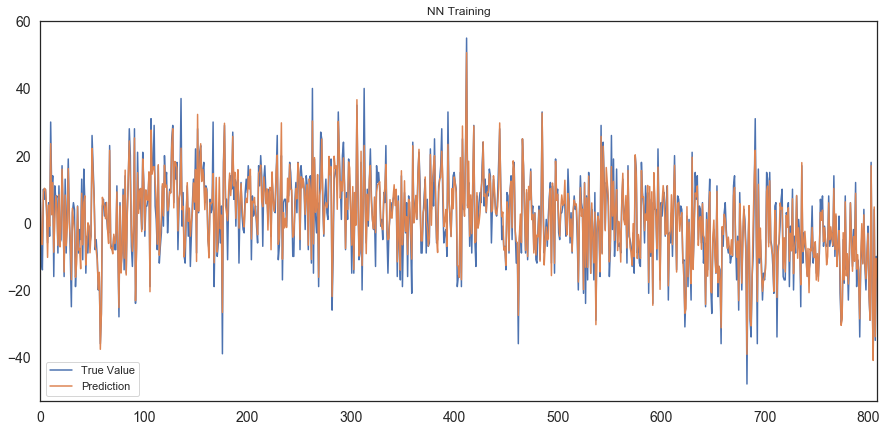

adj train r^2 = 0.9091444451519908
train mse = 15.931304791674052


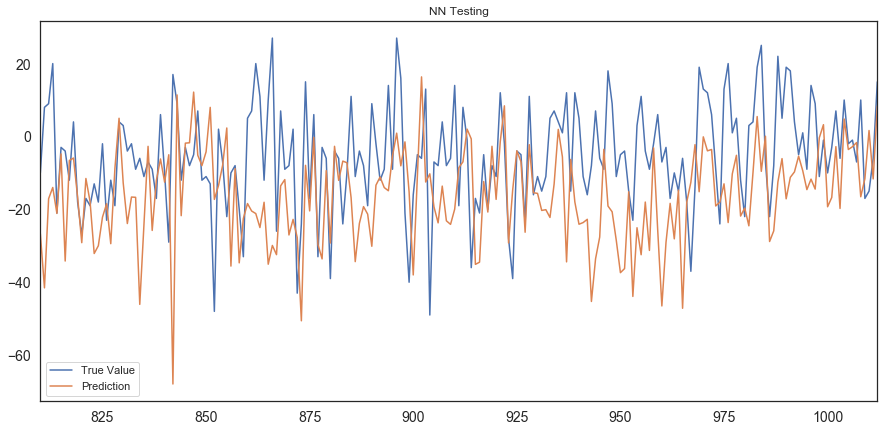

adj test r^2 = -1.1798844855393278
test mse = 438.8696272623452


In [33]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [34]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3.loc[train_y3['prediction'] > train_x['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_x['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_x['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_x['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_x['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_x['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_x['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_x['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 93.7%
The testing accuracy is 65.02%


## LSTM

In [35]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [36]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='linear',kernel_initializer='lecun_uniform'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.WinMargin.values.ravel(), validation_data=[X_tst_t, test_y['WinMargin'].values.ravel()], epochs=40, verbose=1, shuffle=False)

Train on 810 samples, validate on 203 samples
Epoch 1/40
810/810 [==============================] - 6s 7ms/step - loss: 0.7589 - val_loss: 0.9525
Epoch 2/40
810/810 [==============================] - 3s 3ms/step - loss: 0.7492 - val_loss: 0.9845
Epoch 3/40
810/810 [==============================] - 2s 3ms/step - loss: 0.6608 - val_loss: 1.0224
Epoch 4/40
810/810 [==============================] - 2s 3ms/step - loss: 0.6398 - val_loss: 0.9996
Epoch 5/40
810/810 [==============================] - 3s 3ms/step - loss: 0.6260 - val_loss: 1.0624
Epoch 6/40
810/810 [==============================] - 2s 3ms/step - loss: 0.6149 - val_loss: 1.0167
Epoch 7/40
810/810 [==============================] - 2s 3ms/step - loss: 0.6086 - val_loss: 1.0837
Epoch 8/40
810/810 [==============================] - 2s 3ms/step - loss: 0.5952 - val_loss: 1.0450
Epoch 9/40
810/810 [==============================] - 2s 3ms/step - loss: 0.5939 - val_loss: 1.0873
Epoch 10/40
810/810 [==============================] -

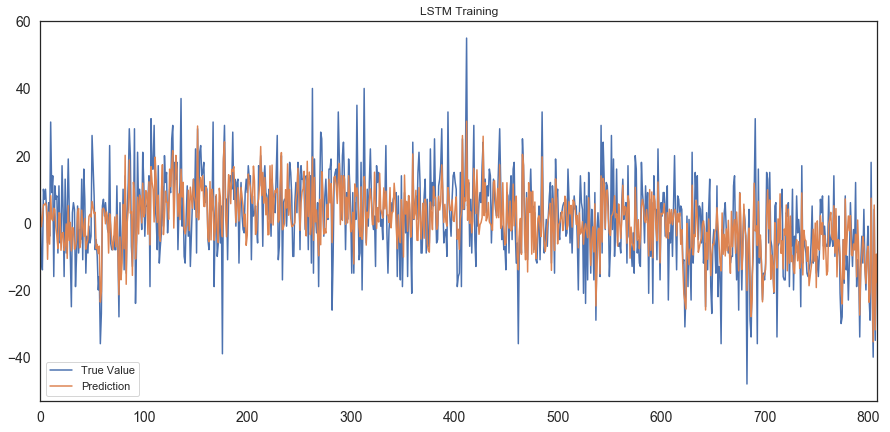

adj train r^2 = 0.5055175349048332
train mse = 86.70632058488873


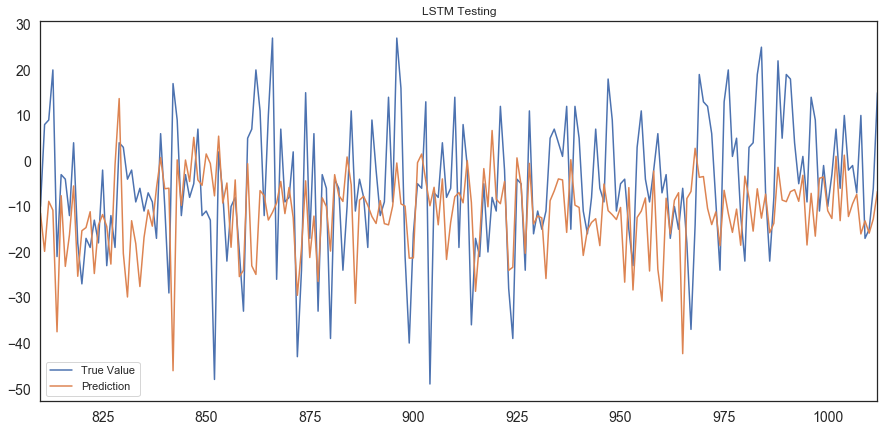

adj test r^2 = -0.2795459132462239
test mse = 257.60715383617804


In [37]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [38]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3.loc[train_y3['prediction'] > train_x['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_x['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_x['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_x['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_x['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_x['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_x['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_x['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 74.94%
The testing accuracy is 64.53%


## TPOT

In [39]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(population_size=5, max_time_mins=2, verbosity=2, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.WinMargin.values.ravel())

/anaconda3/lib/python3.7/site-packages/deap/tools/_hypervolume/pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


Generation 1 - Current best internal CV score: -0.6907096020607921
Generation 2 - Current best internal CV score: -0.6907096020607921
Generation 3 - Current best internal CV score: -0.6854892298521711
Generation 4 - Current best internal CV score: -0.6854892298521711
Generation 5 - Current best internal CV score: -0.6826225804049627
Generation 6 - Current best internal CV score: -0.6826225804049627
Generation 7 - Current best internal CV score: -0.6815780233598592
Generation 8 - Current best internal CV score: -0.6815780233598592
Generation 9 - Current best internal CV score: -0.6801196165015655
Generation 10 - Current best internal CV score: -0.6799836641255448
Generation 11 - Current best internal CV score: -0.6799836641255448
Generation 12 - Current best internal CV score: -0.6799828291929787
Generation 13 - Current best internal CV score: -0.6799828291929787
Generation 14 - Current best internal CV score: -0.6799828291929787
Generation 15 - Current best internal CV score: -0.679982

Generation 122 - Current best internal CV score: -0.6743772786034586
Generation 123 - Current best internal CV score: -0.6743772786034586
Generation 124 - Current best internal CV score: -0.6743772786034586
Generation 125 - Current best internal CV score: -0.6743772786034586
Generation 126 - Current best internal CV score: -0.6743772786034586
Generation 127 - Current best internal CV score: -0.6743772786034586
Generation 128 - Current best internal CV score: -0.6743772786034586
Generation 129 - Current best internal CV score: -0.6743772786034586
Generation 130 - Current best internal CV score: -0.6742491366638191
Generation 131 - Current best internal CV score: -0.6742491366638191
Generation 132 - Current best internal CV score: -0.6742491366638191
Generation 133 - Current best internal CV score: -0.6742491366638191
Generation 134 - Current best internal CV score: -0.6742491366638191
Generation 135 - Current best internal CV score: -0.6742491366638191
Generation 136 - Current best inte

TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=2, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=5,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=2,
       warm_start=False)

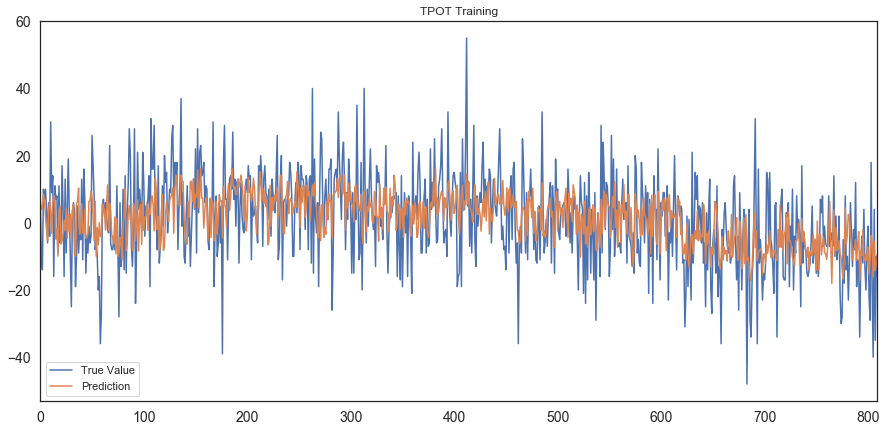

adj train r^2 = 0.2642915927888614
train mse = 129.00471405061828


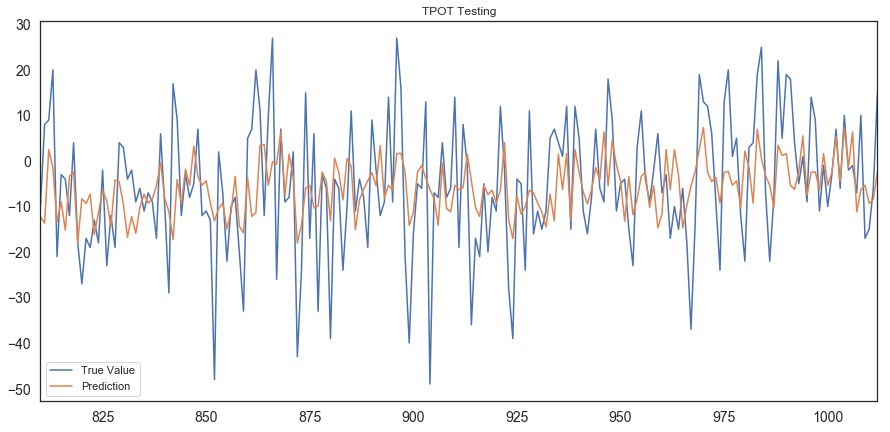

adj test r^2 = 0.18095081566705984
test mse = 164.89672394213676


In [40]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [41]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3.loc[train_y3['prediction'] > train_x['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_x['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_x['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_x['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_x['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_x['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_x['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_x['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 69.38%
The testing accuracy is 68.47%
